# SciKera Regression

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

from scikeras.wrappers import KerasRegressor

In [2]:
# df = pd.read_excel("housing_data.xlsx")
url = "https://raw.githubusercontent.com/ie-ai-class/ai-2566-2/main/T6%20-%20ANN/S02%20-%20Regression/housing_data.csv"
df = pd.read_csv(url)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=0, xmax=1, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(results, y_train, y_test, y_train_pred, y_test_pred):
    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "MSE Train": MSE_train,
        "MSE Test": MSE_test,
        "R2 Train": R2_train,
        "R2 Test": R2_test,
    }
    results.append(data)
    return

In [4]:
# Shuffle data
df = df.sample(frac=1, random_state=1)

# Extract data

colsX = [i for i in df.columns if i != "MEDV"]
X = df[colsX].values
y = df["MEDV"].values
print(X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Scale y data
nm = MinMaxScaler()
y_train = y_train.reshape(-1, 1)  # Required for sklearn api
y_test = y_test.reshape(-1, 1)
nm.fit(y_train)
y_train_scaled = nm.transform(y_train)
y_test_scaled = nm.transform(y_test)

(506, 13)


In [5]:
def get_clf_model(hidden_layer_sizes, meta, compile_kwargs):

    model = tf.keras.Sequential()
    input_layer = tf.keras.layers.Input(shape=(meta["n_features_in_"]))
    model.add(input_layer)

    for i, hidden_layer_size in enumerate(hidden_layer_sizes):
        hidden_layer = tf.keras.layers.Dense(
            units=hidden_layer_size, activation="relu", name=f"hidden{i+1}"
        )
        model.add(hidden_layer)

    output_layer = tf.keras.layers.Dense(units=1, name="output")
    model.add(output_layer)

    model.compile(
        optimizer=compile_kwargs["optimizer"],
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.mean_absolute_percentage_error],
    )

    return model

In [6]:
tf.keras.backend.clear_session()
tf.keras.backend.set_epsilon(1)

In [13]:
clf = KerasRegressor(
    model=get_clf_model,
    hidden_layer_sizes=(16,),
    optimizer="adam",
    optimizer__learning_rate=0.001,
    epochs=200,
    batch_size=16,
    validation_split=0.2,  
    verbose=1,
)

In [14]:
clf.fit(X_train_std, y_train_scaled)

Epoch 1/200
23/23 [==============================] - 0s 819us/step - loss: 0.4204 - mean_absolute_percentage_error: 57.2610
Epoch 2/200
23/23 [==============================] - 0s 887us/step - loss: 0.2313 - mean_absolute_percentage_error: 39.9867
Epoch 3/200
23/23 [==============================] - 0s 909us/step - loss: 0.1444 - mean_absolute_percentage_error: 29.6955
Epoch 4/200
23/23 [==============================] - 0s 1ms/step - loss: 0.1038 - mean_absolute_percentage_error: 24.3800
Epoch 5/200
23/23 [==============================] - 0s 1ms/step - loss: 0.0839 - mean_absolute_percentage_error: 21.4690
Epoch 6/200
23/23 [==============================] - 0s 887us/step - loss: 0.0672 - mean_absolute_percentage_error: 19.2487
Epoch 7/200
23/23 [==============================] - 0s 863us/step - loss: 0.0562 - mean_absolute_percentage_error: 17.6484
Epoch 8/200
23/23 [==============================] - 0s 864us/step - loss: 0.0471 - mean_absolute_percentage_error: 16.1872
Epoch 9/200


KerasRegressor(
	model=<function get_clf_model at 0x00000293E6C5B420>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=16
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0
	shuffle=True
	run_eagerly=False
	epochs=200
	hidden_layer_sizes=(16,)
	optimizer__learning_rate=0.001
)

In [10]:
y_train_pred = clf.predict(X_train_std)
y_test_pred = clf.predict(X_test_std)

10/10 [==============================] - 0s 724us/step


,MSE Train,MSE Test,R2 Train,R2 Test
0,0.006688,0.007916,0.840662,0.807006


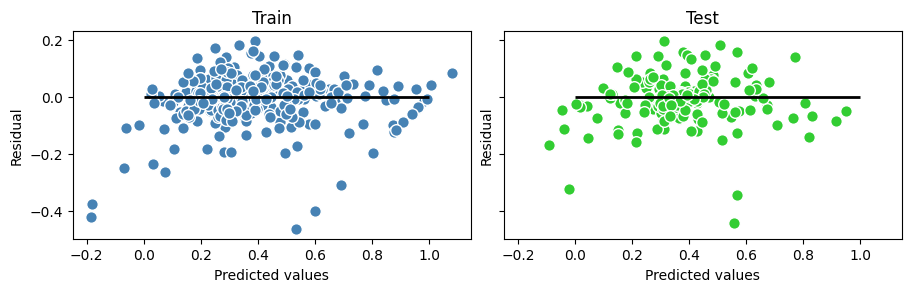

In [12]:
fig, ax = plt.subplots(
    1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
)
res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train_scaled, title="Train")
res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test_scaled, title="Test", color="limegreen")
ax[0].set_xlabel("Predicted values")
ax[0].set_ylabel("Residual")
ax[1].set_xlabel("Predicted values")
ax[1].set_ylabel("Residual")

results = []
df = store_results(
    results=results,
    y_train=y_train_scaled,
    y_train_pred=y_train_pred,
    y_test=y_test_scaled,
    y_test_pred=y_test_pred,
)

results_df = pd.DataFrame(results)
display(results_df)